In [1]:
import requests
import cassiopeia as cass
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
key = open('../API-keys/riot_dev_key.txt').read()

In [3]:
cass.set_riot_api_key(key)

In [25]:
r = requests.get('http://canisback.com/leagueId/league_euw1.csv')

In [51]:
player_ids = pd.read_csv('http://canisback.com/leagueId/league_euw1.csv')

In [55]:
high_elo_ids = player_ids[player_ids.tier.isin(['DIAMOND','GRANDMASTER'])]

In [7]:
match_ids = r.json()

In [4]:
chall_flex = cass.get_challenger_league('RANKED_FLEX_SR', 'EUW').entries

Making call: https://euw1.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_FLEX_SR


In [5]:
len(chall_flex)

200

In [6]:
def is_flex(x):
    if x.queue.value == 'RANKED_FLEX_SR' and x.version[:2] == '10':
        return True
    else:
        return False

In [96]:
df = pd.DataFrame(columns=['id', 'team', 'win', 'champions'])

In [8]:
role_dict = {
    ('MID_LANE', 'SOLO'): 'MIDDLE',
    ('TOP_LANE', 'SOLO'): 'TOP',
    ('JUNGLE', 'NONE'): 'JUNGLE',
    ('BOT_LANE', 'DUO_CARRY'): 'BOTTOM',
    ('BOT_LANE', 'DUO_SUPPORT'): 'SUPPORT'
}

In [7]:
def match_scrape(list_df, chall_flex):
    for player in tqdm(chall_flex):
        try:
            match_history = player.summoner.match_history.filter(is_flex)

            for match in match_history:

                try:
                    red_dic = {'team':'red', 'id':match.id, 'win':not match.blue_team.win}
                    red_champ = {}
                    blue_dic = {'team':'blue', 'id':match.id, 'win':match.blue_team.win}
                    blue_champ = {}

                    for participant in match.participants:
                        position = role_dict[(participant.lane.value, participant.role.value)]
                        champion = participant.champion.name
                        if participant.side.name == 'blue':
                            blue_champ.update({position:champion})
                        elif participant.side.name == 'red':
                            red_champ.update({position:champion})

                    blue_dic.update({'champions':[blue_champ['TOP'],blue_champ['JUNGLE'],blue_champ['MIDDLE'],blue_champ['BOTTOM'],blue_champ['SUPPORT']]})
                    red_dic.update({'champions':[red_champ['TOP'],red_champ['JUNGLE'],red_champ['MIDDLE'],red_champ['BOTTOM'],red_champ['SUPPORT']]})

                    list_df.append(blue_dic)
                    list_df.append(red_dic)
                except Exception as e:
                    print(e)
                    continue
        except:
            pass
    try:
        return pd.DataFrame(list_df)
    except:
        return list_df

In [10]:
list_dfg = []

In [11]:
df = match_scrape(list_dfg, chall_flex)

Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/BddCPaGNloLDYeG_ek4XnVR43LqWnAM2iQr6LSdjd05CUdk
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/4u0AOG-Esbx8x-5kGJShlQzuy28qyvmBj9pYGz7jECn3Fg?beginIndex=0&endIndex=100
Making call: https://ddragon.leagueoflegends.com/realms/euw.json
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725796553
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725746114
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/_AfbE2y9XId8sgdP2TaOnTk76Gv9dyiX2AidxageyJDRLYs
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/TKweN_OJOOlcbLeHO0s-2azusj5SXyg6zsn-aJLx3-fRKu0?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/DLxtCenXXkU4jckn1-mzc9Zlvp6354rbQZo401vg21KcWLc
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/qg93W7rJofSe5ptMams7IIsfvr2aj2cNUbRdSlHfSV_aW

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4650719001
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4649342504
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4648249220
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4646038319
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4645094653
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643986219
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643889290
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643842328
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643712225
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643286244
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4641230135
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4638856115
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4638464490
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4607491144
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4607247630
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4607179608
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4607120030
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4607131743
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4606944466
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4606846674
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4606838957
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4606682142
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4606128244
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4605820361
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4605261515
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4605141702
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4581352536
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580697057
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580579056
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580601322
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580374458
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580271513
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580202105
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4579480756
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4579255860
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4579169979
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4578979243
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4578741181
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4578524098
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4560995907
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4560806002
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4560760330
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4560479254
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4560413910
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4560386146
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4560256620
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4560240751
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4560162723
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559873039
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559695265
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559616870
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559556067
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4532006649
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4531878284
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4531748228
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4531716967
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4531599326
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4531528413
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4531166297
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4530993920
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4530698446
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4530516629
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4530471769
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4530318620
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4530363986
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4503387453
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4503371437
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4503283488
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4503255669
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/qg93W7rJofSe5ptMams7IIsfvr2aj2cNUbRdSlHfSV_aWIU?beginIndex=1000&endIndex=1100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4503082101
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4502980323
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4503031013
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4502886879
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4502839502
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4502769727
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4502677267
Making 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4481713688
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4481710552
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4481304374
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4481227599
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4481132283
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480683952
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480543531
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480256008
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480098840
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480091058
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4479956372
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4479962064
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4479864225
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4463293927
INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4463293927
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4463184461
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462892211
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462826782
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462359536
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462421367
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462273420
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462228480
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462205101
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462139353
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462015212
Making call: https://

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4432946648
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4432600453
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4431793455
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4431821340
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4431331629
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4431166797
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4431142201
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4431116349
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4431071666
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4430995153
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4430968485
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4430900852
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4430884266
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411769798
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411484732
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411491398
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411367970
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411413732
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411337785
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411266302
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411069181
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411045352
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4410304266
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406535141
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406265325
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4402212192
Making call:

INFO: Unexpected service error (429), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4119017914
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4119042980
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4118975789
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4118993639
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4116990788
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4116645145
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4115888955
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105764253
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/qg93W7rJofSe5ptMams7IIsfvr2aj2cNUbRdSlHfSV_aWIU?beginIndex=2100&endIndex=2200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4080888779
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070218287
Making call: htt

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056399888
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056252000
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056206003
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056187424
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056138256
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056078419
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056041003
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056000939
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4055975263
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4055933573
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4055828905
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4055767914
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4055679837
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3976262388
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3976206432
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3976161323
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3954775725
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953165910
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3952457643
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3952318401
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3945748652
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3945414642
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3945388802
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3945363252
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3945333609
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3944769650
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3881219870
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3881200467
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3881128111
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3881027805
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880931192
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880659851
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880630215
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880540398
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880466769
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880330503
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880166171
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880030149
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879454971
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/qg93W7rJofSe5ptMams7IIsfvr2aj2cNUbRdSlHfSV_aWIU?beginIndex=3300&endIndex=3400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3856265556
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3856228448
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3856141856
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3856132309
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3850187760
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3850120854
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3844600496
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3844564406
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3844527159
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3844495273
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3842965185
Making 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/qg93W7rJofSe5ptMams7IIsfvr2aj2cNUbRdSlHfSV_aWIU?beginIndex=3900&endIndex=4000
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750590556
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/qg93W7rJofSe5ptMams7IIsfvr2aj2cNUbRdSlHfSV_aWIU?beginIndex=4000&endIndex=4100
Making call: https://cdn.merakianalytics.com/riot/lol/resources/patches.json
Making call: https://ddragon.leagueoflegends.com/api/versions.json
Making call: https://ddragon.leagueoflegends.com/cdn/10.15.1/data/en_GB/championFull.json
('MID_LANE', 'DUO_SUPPORT')
Making call: https://ddragon.leagueoflegends.com/cdn/10.14.1/data/en_GB/championFull.json
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
Making call: https://ddragon.leagueoflegends.com/cdn/10.13.1/data/en_GB/championFull.json
('MID_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('BOT_LANE

('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'TOP'
'TOP'
('BOT_LANE', 'DUO')
('MID_LANE', 'DUO_CARRY')
('MID_LANE', 'DUO')
('BOT_LANE', 'SOLO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'MIDDLE'
('TOP_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
'TOP'
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO_CARRY')
('MID_LANE', 'DUO_SUPPORT')
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO_CARRY')
'NoneType' object h

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4709509521
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4705781033
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4705734538
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4705648957
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4705606060
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4705611707
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4703362834
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4700259952
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4700314810
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4695097411
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4695004774
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694738675
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694588948
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4500420923
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4495368772
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4495351473
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4495322277
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4495115983
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492636287
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492497409
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492429171
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4490218004
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4490157627
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4490162554
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4490092213
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4488646290
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4284343428
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4284245145
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282780136
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282798714
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282787993
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282777482
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282815486
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282737088
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/sPHLR0b1Xjzk-wFHqrATABoJicJJbs_fmENphtcZP127qDChbUjQpShU?beginIndex=700&endIndex=800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282744318
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282781391
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282658150


Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4128451528
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4128346951
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4128294393
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4126969758
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4126973714
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4126933314
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4126499033
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4126484196
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4126435024
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4126389267
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4125308840
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4125289432
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4125253560
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4685435982
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684257924
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684272425
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684139319
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4675002726
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4673173087
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4673039692
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4671708848
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4671683660
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4671350436
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4671315181
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4671323355
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4668344631
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4489872747
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4489722291
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4488310438
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4487932798
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4487253487
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4487124250
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4487008052
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4477394289
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4476326896
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4475818854
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4475638193
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4475239353
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4475060706
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4351169713
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4351145429
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4350979749
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4351002835
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4345296581
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4345099755
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4344357740
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4344275568
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4342047704
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341999264
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341940392
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4340981885
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4340866141
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4015754504
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4015700381
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4015212166
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4015176514
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004225463
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004231957
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4003493800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4003319057
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4003146935
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4003161254
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4003042460
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4002987246
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4002964133
Making call:

'TOP'
'NoneType' object has no attribute 'value'
'TOP'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
'TOP'
('MID_LANE', 'DUO_CARRY')
'TOP'
'TOP'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO_SUPPORT')
'TOP'
('MID_LANE', 'DUO')
'TOP'
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'TOP'
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('BOT_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO')
'TOP'
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'MIDDLE'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('BOT_LANE', 'SOLO')
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
'TOP'
'TOP'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO_CARRY')
('BOT_LANE', 'DUO')
'TOP'
'TOP'
('TOP_LANE', 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4616840664
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4616695916
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4616614636
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4615445177
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4613110794
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4609101949
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4604241614
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/-s7d9jBDYt2ZqI92dYrtDSdFX5ATKdYlYzwvTLIS68d3fQ?beginIndex=200&endIndex=300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4593054971
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4592945904
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4592924701
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4592769179
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4472499282
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4471077369
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4469938438
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4469770015
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4434056281
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4433558767
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4433320333
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4433352441
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4433267401
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4433232483
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4433177078
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4433170840
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4432682551
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4410192954
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4410132613
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4410070291
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4409797572
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4409709503
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4409661679
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4409551958
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4409486463
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4409437850
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4409320088
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4408024520
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4408012734
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4408003047
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4383903464
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4380272051
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4380266747
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4380139815
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4379976373
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4379859097
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4379757297
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4379669879
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4378644280
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4378485934
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4378448961
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4378180652
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4378101097
Making call:

('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
'JUNGLE'
'NoneType' object has no attribute 'value'
'TOP'
'TOP'
'MIDDLE'
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'TOP'
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('BOT_LANE', 'SOLO')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
'TOP'
'NoneType' object has no attribute 'value'
'TOP'
('BOT_LANE', 'DUO')
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
('TOP_L

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/rc-lb2ITf4oen7SougQa2hglUsBDHLlOr-PgdbbwiEa3EYE?beginIndex=100&endIndex=200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4671652855
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4671484542
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4667512337
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4667282957
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4667007279
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4666992333
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4666858277
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4666931443
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4666759052
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4666831595
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4665352028
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4533881296
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4533587655
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4533489645
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4533450925
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4520744417
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4520581460
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4520363707
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4517666283
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4516031770
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4515955847
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4515816545
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4515480185
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4515419981
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4458811319
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4453686537
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4453499249
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4453533325
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4451409784
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4451362909
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4450910027
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4450720342
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4450662910
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4450509834
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4449992307
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4449812330
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4449521322
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4417492801
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4417339803
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4417356044
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4417333735
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4417152532
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4417099024
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4417034833
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416561157
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416368328
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416304970
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416289779
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416153343
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416109348
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4242483256
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/rc-lb2ITf4oen7SougQa2hglUsBDHLlOr-PgdbbwiEa3EYE?beginIndex=1300&endIndex=1400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4207843838
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4183114665
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/rc-lb2ITf4oen7SougQa2hglUsBDHLlOr-PgdbbwiEa3EYE?beginIndex=1400&endIndex=1500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/rc-lb2ITf4oen7SougQa2hglUsBDHLlOr-PgdbbwiEa3EYE?beginIndex=1500&endIndex=1600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4147556027
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4147457183
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/rc-lb2ITf4oen7SougQa2hglUsBDHLlOr-PgdbbwiEa3EYE?beginIndex=1600&endInd

'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO_CARRY')
('TOP_LANE', 'DUO')
('BOT_LANE', 'SOLO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
'MIDDLE'
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
'TOP'
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO_CARRY')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
'MIDDLE'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO_CARRY')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
'TOP'
'TOP'
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('BOT_LANE', 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4663448457
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4662268376
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4658906474
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4658830296
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4655722900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4655644692
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4655279490
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4653220730
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640757822
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640761718
INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640761718
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4638926722
Making call: https://

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4143017394
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4137826241
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4137562760
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4137453787
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4137416088
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132672752
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132621750
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132602705
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132512076
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/L2hwYsJW2l02sklByKCt2jEW7XsB5svB158Z9dy2zim3ypU?beginIndex=800&endIndex=900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132473297
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4130945175
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3876082811
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3875958320
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3875870052
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3875769829
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3875300535
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3875280491
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3872924596
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3872911743
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3872840255
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3872429389
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3872430853
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3872368636
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3872318923
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4696171127
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4695190449
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4695252787
INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4695252787
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4695134501
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694675831
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4692257596
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4692209434
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4690796256
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4690552201
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4689452431
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4689319521
Making call: https://

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4432111140
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4419374634
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4419071828
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4418498540
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4418009173
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4415503545
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4411861701
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4410815317
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4410795961
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/k8xtfNQnWBlVXO2egNye-DwNpWbKh0_b0nbeYpd8Wpk7Sys?beginIndex=300&endIndex=400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4372245978
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4369966227
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4212361372
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4212219473
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4212234343
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4212150200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4212025053
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4211804323
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4211744191
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4211666881
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4211606981
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4211553153
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4211489097
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4210739885
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4210696334
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4019065123
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/k8xtfNQnWBlVXO2egNye-DwNpWbKh0_b0nbeYpd8Wpk7Sys?beginIndex=900&endIndex=1000
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4016164052
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4015773682
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3996368221
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/k8xtfNQnWBlVXO2egNye-DwNpWbKh0_b0nbeYpd8Wpk7Sys?beginIndex=1000&endIndex=1100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3903999718
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3903945231
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/k8xtfNQnWBlVXO2egNye-DwNpWbKh0_b0nbeYpd8Wpk7Sys?beginIndex=1100&endIndex=1200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/390390817

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3775523494
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3775468805
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3774067813
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3773300314
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3772457342
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3772462475
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3770778280
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3770683366
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3770576079
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3770498203
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3770463693
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3770443200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3770403910
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3757501428
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3757099574
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3757055353
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3757007777
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3756971731
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3756917338
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3756866060
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3756820331
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3756700315
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3756397820
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3756268774
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3755747690
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3755689039
Making call:

'TOP'
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/M5_M6dErk8-iyKhm7ICCorZGPnLrM93w2_2RQcr3i6R0GQw
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/EmA6sTcbrIBpUjJpSprSzVw8h0eYim8sfY8DsCYHSC6-SUs?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725863603
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725773837
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725571225
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725485446
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4723938381
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/QwgWBPtjXmGFL6pcr4ECbzLW0CX0MuIDhhpCdXwe39hWiZ0
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/_EU2ru756yHynMqAMbnD4E4T7T9pQ2pXaY8fNIU5LWaFbfY?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/oY

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4626116535
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4626043643
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4625441441
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4625384161
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4625315703
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4625225457
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4625083069
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4624925653
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4624826111
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4624631288
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4624543566
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4624513823
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4624379987
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406486950
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406426654
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406366801
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406269054
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406253872
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406177603
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4405262454
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4402150420
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4402116329
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4402080994
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4402004518
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4400675930
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4400682417
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4169291207
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4169243245
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4169201995
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4168226845
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4168191883
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4166506761
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4160274823
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4160245712
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4160196213
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4160127547
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4159032115
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4158960750
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156479922
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031462622
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031340365
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031309228
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031321302
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031234372
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031251819
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031216184
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031155881
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031131533
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031117209
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030149249
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029929884
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029952106
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3956937785
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3956901057
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3956852283
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3956771139
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3956731269
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3956634696
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3955872224
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3955833545
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3955795265
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3955727135
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3955655018
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3955356714
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3955290037
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4712272912
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4711132758
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4711006413
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4707266271
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4698200675
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694930152
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694904675
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4693329077
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4693309863
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4692963164
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4692838428
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4690403896
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4690325312
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4460139607
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4458448729
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4452343739
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4414229373
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4414293563
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4412995040
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4405024874
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4404470165
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4403243738
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4403186369
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/zumkoEYvZ-TdIpTopkBTJLJL_DW90Nz-pKWmqiclgUotxg?beginIndex=400&endIndex=500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384600514
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4165258894
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4165043467
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4162607994
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4162387947
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4161146131
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4157999724
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156983694
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4155370984
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4153962746
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4152664184
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4152625628
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/zumkoEYvZ-TdIpTopkBTJLJL_DW90Nz-pKWmqiclgUotxg?beginIndex=1000&endIndex=1100
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4038329980
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4033969002
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4033634181
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4032598337
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4032498444
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4032440027
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4032275733
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031197691
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029057660
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029050478
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026309770
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026314649
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4025228390
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3933094035
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3932838460
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/zumkoEYvZ-TdIpTopkBTJLJL_DW90Nz-pKWmqiclgUotxg?beginIndex=1700&endIndex=1800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3928578394
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3927771379
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3927557405
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3922771153
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3922621430
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3922403277
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3922345903
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3922056721
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3921845811
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3810611096
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3810546845
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3809554519
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3809503999
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3809292738
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3808485326
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3808443087
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3807675097
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3807622527
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3807012033
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3806271400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3806117704
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3805314371
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3733163813
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3733129934
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3731765710
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3731126452
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3731110955
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3729881549
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3729117285
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3726514372
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3726483173
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3720839682
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3718576992
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3718543714
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717724297
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4697963465
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4697828932
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4697850914
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4697716755
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4697712527
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4697348553
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4697274754
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694992944
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694855380
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694505858
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694450301
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694400792
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4694288876
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4630456323
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4626217370
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4626192415
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4626126965
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4626122989
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/xDC_MH9HpDrExFuZ0E6_cuIQDr6VXj9gAHxt4yjJLqlh8g?beginIndex=300&endIndex=400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4624227306
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4622994261
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4622907832
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4622283379
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4622228728
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4622255398
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4548703804
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4548573227
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4547336201
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4547288878
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4544855200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4544861193
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4543712352
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4542828226
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4542881306
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4542120500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4541994381
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4540749412
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4540264176
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173607909
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173565525
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173540662
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173502809
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173432941
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173410911
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173191898
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173044852
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173016497
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4173010668
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4172924968
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4172888152
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4172629606
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4137827400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4137697274
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4137587717
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4137479152
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4137397782
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133042067
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133004415
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132489017
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132500686
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132441465
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132362576
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132314707
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/xDC_MH9Hp

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029543510
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029484077
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4028231784
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026201765
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026158932
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026097526
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026096175
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026058377
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026032314
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4025888534
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4025840359
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4024896460
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4024849867
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953823387
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953803163
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953802409
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953821208
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3951116018
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3942611346
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3941531077
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3936896698
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3936882531
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3936818395
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3930563441
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3930562456
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3928428253
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798310955
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798259198
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797961963
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797938362
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797933195
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797913878
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797896596
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797856006
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797830909
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797776708
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797560456
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3794101622
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3788211318
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4721715543
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4720468306
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4720500852
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4719909822
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4719905687
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4719922282
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4719480090
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4717659563
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4716220756
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4716058906
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4714586989
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4712819704
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4711610469
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4535654848
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4530467278
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Q3DoptzN1KqYz9pmnmttY_mceWRi-ye8wSZstnbQnvPLUkQ?beginIndex=400&endIndex=500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4528747369
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4525075646
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4522554532
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4520328228
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4520009761
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4519919493
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4519855242
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4510658910
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4510569356
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4385214823
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4385164640
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384818341
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384862124
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384713039
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384485851
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384416717
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Q3DoptzN1KqYz9pmnmttY_mceWRi-ye8wSZstnbQnvPLUkQ?beginIndex=800&endIndex=900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4378835249
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4378862738
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4374633395
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4374641237
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4656028132
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4653431414
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4653294991
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4651256003
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4649815012
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4649375357
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4649289099
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643602837
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643344017
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643219223
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643116980
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643037172
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4639242740
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274627319
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274542915
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233935984
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233893179
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233800035
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232772893
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232766782
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232713751
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232620133
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4223003970
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4207017144
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4193407381
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4193359040
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4071528516
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4071367669
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070348310
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070218946
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070212767
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070164647
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070115594
INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070115594
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070080168
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070003762
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4066779607
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4066730606
Making call: https://

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4027929982
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4027471208
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4027394447
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4027373463
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4027254067
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026126416
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026089199
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026083434
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026064240
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4025947017
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4025922197
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4023672252
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4023551813
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3992999081
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3993006353
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3992985097
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990800823
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990733800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990684467
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990613814
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3989162525
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3989109362
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3986467699
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3986387405
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3985689026
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3985619807
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3968794755
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3968750246
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3968787097
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3968741299
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3968106599
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3968070820
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3968041099
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3967949908
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3967908962
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3967911283
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3967815652
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3967753692
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3967236347
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3868071285
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3868008589
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3866215370
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3866158606
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3866123970
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3866092149
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3866051777
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3866001010
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/ley_y5lynHmOMqFyt5TwO-tJ0VZ87WxuG0zitLzcOMq_DQ?beginIndex=1400&endIndex=1500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3865951981
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3864894702
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3864861923
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3740214664
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3740150215
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3739508668
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3739485928
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3739444628
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3739433265
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3739358653
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3738340403
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3738326049
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734786213
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734747492
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734717616
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3733767092
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4706187646
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4701452581
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4701364771
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4688856915
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4688832012
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4688487834
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4688155003
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4687734645
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4687208806
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4687120156
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4685430537
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4685414834
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4680771186
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4475204095
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4473508679
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4470517678
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462620776
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462503298
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4461378359
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4461337971
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4461306150
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4457153473
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4456342004
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4454382004
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4445636594
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4442208532
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4284471106
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4282774285
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4281372572
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4280786264
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4280782786
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4279448618
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/hKYvmoq3u5CsfjlKpqpxlxyw8ea4e6YcdLtmlvl-Y3eNFQ?beginIndex=1000&endIndex=1100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4270853522
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4270806444
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4270687896
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4270671332
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4270625863
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4146594915
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4145918882
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4143030789
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4143003460
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141418718
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/hKYvmoq3u5CsfjlKpqpxlxyw8ea4e6YcdLtmlvl-Y3eNFQ?beginIndex=1500&endIndex=1600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4134463649
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4134396569
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4134371228
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133220362
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133235424
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132101656
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/hKYvmoq3u5CsfjlKpqpxlxyw8ea4e6YcdLtmlvl-Y3eNFQ?beginIndex=2200&endIndex=2300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3959954047
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3956890571
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3947301169
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3947100949
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3947040014
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3947032647
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3946152406
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/hKYvmoq3u5CsfjlKpqpxlxyw8ea4e6YcdLtmlvl-Y3eNFQ?beginIndex=2300&endIndex=2400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3945229028
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3944629241
Maki

('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'TOP'
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO_CARRY')
('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO_SUPPORT')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
'TOP'
('MID_LANE', 'DUO_CARRY')
('MID_LANE', 'DUO_CARRY')
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/uXUdkSWx6gSRyq7iu7EAbGlZ-85oS_9fjCo1_AIYOenDGX0
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/UcGHsAyaFktf-RH1f7OJY6IvgM49yERNlML76d9DOcIXXWU?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/65CwakAeXnABLdENn-T3rgLfW5YPgldwFlPVpE8lN_RcFKw
Making call: 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4544954355
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4544907466
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4544892187
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4540287824
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4540271072
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4535994314
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4535933304
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4525196904
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4525010410
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Z1wBkiUoYprfYboXn3yMfu_hDH4CT086K9yLCIQOFIMzsg?beginIndex=200&endIndex=300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4505845268
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4505795077
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4392540684
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4392442756
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4392353424
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390961859
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390904852
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Z1wBkiUoYprfYboXn3yMfu_hDH4CT086K9yLCIQOFIMzsg?beginIndex=400&endIndex=500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390901480
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390845853
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390720420
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4389953912
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4389876151
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4389881189
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275771557
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275667581
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275622546
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275397008
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275406252
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275392212
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275370505
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275342095
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275226710
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275048107
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274987154
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274886098
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274750289
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4142402112
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4142325955
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141326726
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141342066
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141274119
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141265316
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141170295
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139795927
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139791272
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139736738
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139731718
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4138639470
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4138647916
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4118503325
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4118409664
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4118087609
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4118027038
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4117983793
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Z1wBkiUoYprfYboXn3yMfu_hDH4CT086K9yLCIQOFIMzsg?beginIndex=1100&endIndex=1200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4113796282
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4113708967
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4113648751
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4113631806
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4110098592
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4110036731
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Z1wBkiUoYprfYboXn3yMfu_hDH4CT086K9yLCIQOFIMzsg?beginIndex=1200&endIndex=1300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4093519491
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4093475674
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4093340133
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4092681338
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4092653269
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4092348754
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4092375751
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4092345066
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4091850247
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4091814614
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4091734727
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4073369138
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4072119161
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4072115523
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4072111137
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4072091669
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4072007105
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4071978861
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4071952643
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4071887105
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4071815911
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4071796225
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4071771864
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4071637035
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4048177294
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4048214169
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4047804112
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4047728270
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Z1wBkiUoYprfYboXn3yMfu_hDH4CT086K9yLCIQOFIMzsg?beginIndex=1500&endIndex=1600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031902414
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031840033
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031870709
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031803091
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4031021966
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030937793
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030873162
Making c

('TOP_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO_CARRY')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'TOP'
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO_CARRY')
('BOT_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO_SUPPORT')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO_CARRY')
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/vi3nYtGO8U0tOwdR0GnTQDSqdOFwWb6eoYftJo__YF31Xj8
Making call: https://euw1.api.riotgam

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480560843
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480453395
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4478500987
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4469768681
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4469804073
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4469709092
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4469683454
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465515094
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465474320
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465383583
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/l-vrf21ZV8J4YMrdJGLAWYMQkuYUMGCrlPA3ocZi_xjB3w?beginIndex=500&endIndex=600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4379428451
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/mgwEwU_q5FQJMPQdn7v5HXAto5Q7dCezN_vGTyJqDsLTJH0?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4722116036
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4722090542
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4718141179
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4717955318
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4714923775
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4714789573
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4714012612
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4711850911
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4708855854
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4708851456
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4706143463
Making call

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4544297325
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4544241058
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4544078757
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4543563422
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4542619459
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4542570455
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4538942968
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4538865225
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4534590136
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4534552134
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4534430991
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4534200718
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4531867487
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233860409
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232925938
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232891905
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232806550
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232722197
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232577945
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232350309
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4231244275
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4231168515
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4231212860
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4231082227
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4231000212
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/mgwEwU_q5

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4046571764
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4046425475
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4045254456
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4045186930
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4044395617
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/mgwEwU_q5FQJMPQdn7v5HXAto5Q7dCezN_vGTyJqDsLTJH0?beginIndex=800&endIndex=900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4044335529
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4044284058
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4044252351
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4044169773
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4042668986
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4042644128
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4009683308
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4009375060
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4008644242
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4007697367
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4007639827
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4007641488
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4007563479
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4007438555
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4005272837
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4005196816
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4005169761
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4003496476
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4003065026
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3818072439
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3818033501
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3815800337
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3815449030
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3815415067
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3813013051
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3810500157
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3810456291
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3804591199
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3804295794
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3804248618
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3802313330
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3802265607
Making call:

('BOT_LANE', 'DUO')
('TOP_LANE', 'DUO_SUPPORT')
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/Zh3G8myZeTuhq-qXhCXlRjK2tmDVzaWrWxR3Yzp3u8IUb1YA
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/5hwul6MFeWZ_0drlx7_MUSJUXxNMCsAXyA-avCuCpLJv8YRAw_5hv8Q8?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/iIP3WHMzT9Z_hWF1ETJtJqAb-EbbRzLJyNDlfxjRAzUkCTQ
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/ETy_KD9QaOuL-MzHlKDRq_XMNx2tJMgfbwWTPrD-7C0ezFQ?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/evKPYLd9AWqVV5tMie4gvexG16kf88tgIirhnmz1e_X0ZYM
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/ZFTeM2pMyfJoXUDc0gkztx3pWmw21rMTxHdEEK7ShLJWRQ?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724759948
Making call: https://euw1.api.riotgames.com/lol/match/

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/ZFTeM2pMyfJoXUDc0gkztx3pWmw21rMTxHdEEK7ShLJWRQ?beginIndex=800&endIndex=900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4229347705
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4229324260
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4229199044
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4229243831
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4227386349
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4227441193
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4227299664
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4227366847
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4225307226
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4225352087
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4225226562
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3831112854
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/ZFTeM2pMyfJoXUDc0gkztx3pWmw21rMTxHdEEK7ShLJWRQ?beginIndex=1800&endIndex=1900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3821215157
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3821194930
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3821212616
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3821192264
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3821169971
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3821157470
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3821151927
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3820091944
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3820069987
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3820078584
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724183194
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724047938
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4723967113
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4723696860
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4723618193
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4718271885
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4718204570
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4715143357
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4714178843
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4714154394
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4714135428
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4708490842
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4708417879
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4347061885
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4346991912
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4346977542
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4346896793
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4346902871
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4346868114
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4345566384
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4345593605
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4329852593
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Sfc7i-s1EZxONwMs7iFO6egFObG9fifsvf7jsRYYFQM-lQ?beginIndex=1400&endIndex=1500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4289581061
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4289513315
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4178093623
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105357684
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105324052
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105274843
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Sfc7i-s1EZxONwMs7iFO6egFObG9fifsvf7jsRYYFQM-lQ?beginIndex=1900&endIndex=2000
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4059254711
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4050785789
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4050737860
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4050690837
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4049598763
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4049533707
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4047050710
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3991693409
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990368732
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990338983
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990303895
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990282250
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990204999
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990131710
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3990087771
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3989772825
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3989714555
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3989607685
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3989509083
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3989457135
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3942076740
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3941384519
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3941348787
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3941288864
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3941113366
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3941037621
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3941008473
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3941010902
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3940934684
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3940876664
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3940868205
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3940020005
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3940037668
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879475950
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879463539
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879432393
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879384333
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878695128
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878687245
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878692407
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878658853
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878646372
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878620288
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3877400419
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3877376807
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3877364447
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3861195679
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860793712
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860820556
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860802435
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860801818
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860810699
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860760340
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860766613
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860764217
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860761017
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860724882
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3860679530
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Sfc7i-s1E

Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/BYBp_nEteaaBOJiMZqGGPrXVvumcwjpZU510nAfitHSwCew
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/xbOnpZ9eWUkNWsr03_j8Lvgm1q03vyacUGQAt0j-5CY5bS4?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725356989
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725381485
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724278411
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724210775
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724172920
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724017097
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4720419305
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4720328193
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4716652611
Making call: https://euw1.api.riotgames.com/l

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4549103571
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4548996594
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4549002001
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4548933418
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4545246216
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4544505252
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4541910762
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4539686228
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4539621220
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4539553634
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4539465403
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4539316869
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4537332995
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4484353542
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4481258813
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480174082
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4479142674
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4478928493
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4478930668
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4478793244
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4478697392
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4477370781
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4476691297
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4476485175
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4476317235
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4476236693
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4194408922
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4194352947
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4194245094
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4193434248
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4191549969
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4191523761
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4191455759
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4191407111
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4191372136
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4190070142
INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4190070142
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4188547956
Making call: https://

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878613454
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/xbOnpZ9eWUkNWsr03_j8Lvgm1q03vyacUGQAt0j-5CY5bS4?beginIndex=1700&endIndex=1800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878557898
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878484571
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3867742925
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3858454738
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3858453340
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3858433013
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3858418529
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3857635152
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3857267267
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3857262932
Making 

('BOT_LANE', 'SOLO')
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/MzaHE75UHpte1FjP5ykIMtloQJt18WLTRogwZUm5RhaGyaM
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Mejtn7D3586K8Gf_7AuYt3SCM0G460UhwsfMceRdo0pyFAA?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/xFx0D-XrjP6EdRJpRmaB4qaZ4iD75eWMGo5vmIMu5lg0x3E
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/33v6akdchJDzxz0_jY9N71E1_J9AAU4kmi0dvXhrGz-3sVU?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724304720
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4719042538
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4715771495
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4715593975
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/33v6akdchJDzxz0_jY9N71E1_J9AAU4kmi0dvXhrGz-3sVU?beginI

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4576557558
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4576554028
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4576458278
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4576472630
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4576217863
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4574051642
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4574036602
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4573653745
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4573615858
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4569019129
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4568981767
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4568892631
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4567204446
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4436460518
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4436146873
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4435771336
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4435635417
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4435588356
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4435537575
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4435453583
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4435366193
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4435299413
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4434733511
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4434669552
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4433390368
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4433443540
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4391596858
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4391434486
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390320112
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390326414
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390260000
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390262301
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390164445
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390135442
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390025789
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4389143203
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4389057599
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4389102697
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4388987155
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4246097848
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4245203394
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4245199902
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4243029054
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4237990996
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/33v6akdchJDzxz0_jY9N71E1_J9AAU4kmi0dvXhrGz-3sVU?beginIndex=2200&endIndex=2300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4230880329
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4230846317
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4230814604
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4230787372
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4230771160
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4230692871
Making 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4197019262
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4197008528
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4196928779
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/33v6akdchJDzxz0_jY9N71E1_J9AAU4kmi0dvXhrGz-3sVU?beginIndex=2400&endIndex=2500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4196901237
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4195860585
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4195795499
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4195801033
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4195681270
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4195369608
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4195371369
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4195174571
Making 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139982044
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139927140
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139904761
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139899148
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139712004
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139675915
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139626422
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139584583
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139380556
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4138641487
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4138560216
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4138433522
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4138386987
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812586574
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812532663
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812487014
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812424379
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812354318
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812304160
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812226217
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812117310
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812103602
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812028751
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3811978830
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3811951138
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3811880540
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4713909211
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4713933819
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4713811532
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4711916513
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/iq0e2LTPcKYVqyvUDl23W3_4P-h9eefnYWRYeC-Z1dqdaA?beginIndex=100&endIndex=200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4652980105
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/iq0e2LTPcKYVqyvUDl23W3_4P-h9eefnYWRYeC-Z1dqdaA?beginIndex=200&endIndex=300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4579251293
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4579106631
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4576925778
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4571177566
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4426244949
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4426220871
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4425777886
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4418379236
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416285614
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416213294
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4414964169
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4412294828
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4410167467
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4410164943
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4402823392
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4401599526
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4401365834
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4332821025
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4332638479
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4331304325
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4331160213
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4331166592
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4330860562
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4330713200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4330666235
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4330540003
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4330046768
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4329739381
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4328343932
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4328266641
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4186226273
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4181026601
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4180471222
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4180415480
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4180381797
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4180366382
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/iq0e2LTPcKYVqyvUDl23W3_4P-h9eefnYWRYeC-Z1dqdaA?beginIndex=1100&endIndex=1200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4174106587
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4171688399
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4171711871
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4170800424
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4165026228
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4049943040
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4048180461
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4045339996
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4045296568
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4045276126
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4044210989
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4044163008
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4044087217
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4044067839
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4038419290
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4038390628
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4038385253
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4037294025
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3928760433
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3927818354
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3927830925
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3926704935
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3926564626
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3926523443
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3926333563
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3926314493
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3926274322
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3925612785
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3925463664
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3925390685
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3925308736
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3883201499
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3883141572
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880999930
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880555599
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880530683
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3880431316
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879772762
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879734172
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879343350
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879320842
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3879031359
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878984153
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3878806910
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3768458388
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3748249056
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3746384029
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3730846415
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3730815001
('MID_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
'TOP'
'TOP'
('TOP_LANE', 'DUO_CARRY')
('MID_LANE', 'DUO_CARRY')
('BOT_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO_SUPPORT')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO_CARRY')
'TOP'
'MIDDLE'
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DU

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684099530
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684053884
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4683970389
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4683938216
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4673402267
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4673279630
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4673315351
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4673241633
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4672774776
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4672773397
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/frNna5-DMJxQnxFhqVfKfNOl_Vske9WGRDNkumAeANtrZw?beginIndex=100&endIndex=200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4665742794
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4457406773
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4457238764
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4453360116
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443994883
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443588246
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443549761
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443465248
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443406644
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443357999
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443360727
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4442540648
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4442444126
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4440407645
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326105355
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326046059
INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326046059
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4325760937
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4325141952
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4325010399
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4325045745
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4323242924
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4322557617
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/frNna5-DMJxQnxFhqVfKfNOl_Vske9WGRDNkumAeANtrZw?beginIndex=1500&endIndex=1600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4321088663
Making call: http

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275332299
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275238667
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275130214
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275070375
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275058561
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275040617
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4273677828
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4273713870
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4273558861
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4273506266
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4273417381
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4273369579
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4273312383
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3895322939
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/frNna5-DMJxQnxFhqVfKfNOl_Vske9WGRDNkumAeANtrZw?beginIndex=3300&endIndex=3400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/frNna5-DMJxQnxFhqVfKfNOl_Vske9WGRDNkumAeANtrZw?beginIndex=3400&endIndex=3500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/frNna5-DMJxQnxFhqVfKfNOl_Vske9WGRDNkumAeANtrZw?beginIndex=3500&endIndex=3600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3864343151
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3863444158
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/frNna5-DMJxQnxFhqVfKfNOl_Vske9WGRDNkumAeANtrZw?beginIndex=3600&endIndex=3700
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3862885563
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3862604

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725287696
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4722317254
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4722149304
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4718595312
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4718365943
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4714986726
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4713223406
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4713095571
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4710925579
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4706137123
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4701984386
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4699632396
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4699570136
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465464391
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465355677
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462957911
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462898933
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462849865
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4458771650
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4458659548
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4458590983
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4454508323
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4454471301
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4436439684
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4436475005
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4436239852
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4135372735
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4087868649
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4053729624
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4048789792
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4048802978
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4048747428
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4043401627
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4043372592
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4038570115
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4038563770
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4036394152
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4036363176
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4035334815
Making call:

'TOP'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/L1RchppdfTBtGYt4cXl1AlDYs9VL4Q-GVQ_gs3iPrDZRhD88
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/DqzNkp7ALtZ_xHRDEeePfBDTVNIG9Lez1qoO93P5t1IJ3JUHc-Am5_FI?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/uPOUcXvv8YDcD1s_y6j0uJiwX3e4Un8d_hg99FiTecKfyg4
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/oQC8FWNKrKZE8rPpVvYv9Qmat3BhLQv8aUeE2hNAkk4BiQ?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724186664
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724111723
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4723919829
Making call: https://euw1.api.riotgames.com/lol/match/v4

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684661488
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684613443
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684432089
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684297938
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684224446
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4684083758
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4683999073
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4683818315
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682981686
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682867757
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682753970
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682587036
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682581946
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4665801724
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4665720684
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4665596049
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4665337912
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4665293338
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4665244944
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4665078996
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4664095193
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4664046949
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4664041761
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/JEM7a_MWP-5Dt7mCvYl4zMbtxcGZ5fqWCT9W-G-S5144XwVnFXOlLVCC?beginIndex=300&endIndex=400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4663693409


Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/T124TXXf7Nb04Y9rtMXt4u-WjjNoDeX6heX7HiqVhuaIBYo?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/ALvZ5U13etujq3I0vxADAB0fMRpdlDqhE4W6NUk7XdDjjU5X
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/RN8dtR3JRc10kaLTlnKiUjGmnLNe4JMehu8VXBMfPcxEjmZUyuk5X3E_?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4723581934
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4723444532
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4721510281
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/zfNJKEWn1rqoVdHBFHMvFBrXxN18e_8mkQVfjjigJVBDPO4
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/M1s4an8ao7HjNmEnrddAmcDwVa_2ocnJiop5yIjO0sDKvbA?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summone

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4309629048
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277732163
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277509695
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4276390002
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274873256
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274721373
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274642750
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274557552
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/nCr_HVvjG2hc6bkGQhVMO488V4lvk3fiAUE5pTBux0i4dA?beginIndex=1100&endIndex=1200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4269006092
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4268911171
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4246779656
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3894988397
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3894250502
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3893833824
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3890520266
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3889491554
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3888883510
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3888758784
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3888628128
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3887409119
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3887386912
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3865141821
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3863148960
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/nCr_HVvjG

('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/oVeMjaXoKWNlSACk_-Jwj6rR73xa14fS5zKVgauwVLUDJtU
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/553x3--J82SMsaf7X8_P2MUKgx7aKHWA9fuxPg-VtuC2Tw?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4725576537
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4722750888
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4722660889
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4718477294
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4718501155
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4713449518
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4711184697
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4711087926
Making call: https://euw1.api.riotgames.com/lol/match/v4/ma

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492302295
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492179583
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492184061
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492100404
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4491111167
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4490971196
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4490673569
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4490039709
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4489629701
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4489653544
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4489607322
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4489543368
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4489489743
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4273144885
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4273084017
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4272927132
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4272913611
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4272756798
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4271956629
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/553x3--J82SMsaf7X8_P2MUKgx7aKHWA9fuxPg-VtuC2Tw?beginIndex=600&endIndex=700
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4271910332
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4271868911
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4271545331
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4271457604
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4271320005
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3820618466
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3820450286
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3820396572
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3820370936
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3817221774
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3817182620
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3816640376
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3816566896
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3816535202
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3816479252
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3816435204
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3814715103
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3814668075
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4721659909
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4718207442
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4715070603
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4710508217
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4708974716
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4707185401
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4704282211
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/IEzO7Pee_fnCDvsYgXcKi4GzG5TWvrkvQrtdSBehiYfRUg?beginIndex=100&endIndex=200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4702527754
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4702369993
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4701069089
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4701075352
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4552410517
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4550553026
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4550248717
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4548594754
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4548430636
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4547971040
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4547779620
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4546187563
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4546006109
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4543532084
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4541337398
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4541176119
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4540533341
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4468540724
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4468288678
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4468042155
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4467816174
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4467202764
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4467110610
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4466170746
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465937004
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465875567
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465535980
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465369701
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4465277224
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4464957421
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/XKENZ7pOYuVO1c6arOduLRy7IGKem_ylUGoaY-kpzxVie64?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/ThDdE_gdStQ1PE3CwJGXdpSqY1tAbO41UhN1X6HoYbECOlY
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/nHlJ61h9c4h5Pa1xsZBc1mH8_P2LhLaIdH2VuNCvxLbVfA?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/sGwgeNA52ntHzl2kzmnF-Y1h420iuiakyLYX6YfribUKIBk
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/GZzo4P9OKnW0lElPnmokhLoETcxT0A7kXZG7BkBcbvEbq9I?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/mYEVh_HWMrWstezw3_jl-MbC69-FtcEskxGzNX3ljiqqI8w
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/A18ntGB8AWN4uzV6tGAaLzqE10X_KpnqydK-9kBzVNAxXg?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotga

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4644038725
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4626392510
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4626017491
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/2J0gBeCmfSWm-lrlv3h9njHeyaQTjdVmC61ISB8A49NXWh8?beginIndex=300&endIndex=400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4620272250
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4620205391
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4618512004
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4616386577
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4616200002
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4612434049
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4606072740
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4606034619
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406360874
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4405959595
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4405963947
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4403244777
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4403166331
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4403118021
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4403029469
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4402974801
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/2J0gBeCmfSWm-lrlv3h9njHeyaQTjdVmC61ISB8A49NXWh8?beginIndex=700&endIndex=800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4400372284
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4400315825
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4400170369
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4676707708
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4675330160
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4673312505
INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4673312505
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4663511967
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4663400532
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4660531134
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4660406653
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4660338838
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4659648842
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4659625615
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/EDEmfHCVcHYrHv-qm6

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/EDEmfHCVcHYrHv-qm6thcAddouUXjcxGDp4L4Ru3TwE?beginIndex=600&endIndex=700
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/EDEmfHCVcHYrHv-qm6thcAddouUXjcxGDp4L4Ru3TwE?beginIndex=700&endIndex=800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/EDEmfHCVcHYrHv-qm6thcAddouUXjcxGDp4L4Ru3TwE?beginIndex=800&endIndex=900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/EDEmfHCVcHYrHv-qm6thcAddouUXjcxGDp4L4Ru3TwE?beginIndex=900&endIndex=1000
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/EDEmfHCVcHYrHv-qm6thcAddouUXjcxGDp4L4Ru3TwE?beginIndex=1000&endIndex=1100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4471740094
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4471743461
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4471476825
Making call: h

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4332176882
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4331056863
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4331094138
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4331082174
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4329613881
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4328294247
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/EDEmfHCVcHYrHv-qm6thcAddouUXjcxGDp4L4Ru3TwE?beginIndex=1700&endIndex=1800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4285078965
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4285050262
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4285044784
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4284949267
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4284915618
Making call

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274129151
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274147017
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274144322
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274152691
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274102293
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274091525
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274069044
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274028917
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274067088
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274016503
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274024673
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274013188
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274041710
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4257561318
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4257487977
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4257374828
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4257308127
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4257342826
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4257255010
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4257135633
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/EDEmfHCVcHYrHv-qm6thcAddouUXjcxGDp4L4Ru3TwE?beginIndex=2000&endIndex=2100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4256325020
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4256282565
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4256200140
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4252193922
Making call

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4068699980
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4068668088
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4068606851
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4068575678
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4068160146
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4067136349
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4067080147
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4067062671
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4066885415
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4066828636
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4066807442
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4066729649
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4066713873
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822801902
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822736079
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822703874
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822673175
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822371692
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822347613
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822361170
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822333730
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822202145
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822137548
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822052378
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3822004649
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3821929438
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3752346741
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750091204
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3748998979
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3747369366
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3737606228
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3737519317
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3737190178
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3737159892
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734791139
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734782234
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734679036
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734655557
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734632484
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717930299
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717871667
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717766494
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717342996
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717341043
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717318337
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717324545
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717280233
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717273040
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717206821
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3717126897
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3716117217
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3716106054
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4667358651
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4667361177
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4663711212
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4663514900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4663440791
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4646274898
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4646198723
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4642885730
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4642881093
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4642733375
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4642619230
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4642644322
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4629371163
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4423218238
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4422016732
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4421759552
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4420835657
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4419197519
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4419140276
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4419165907
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4419046184
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4418971996
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4417060915
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416985961
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416971830
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416455732
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384756587
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384709365
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384672084
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384498358
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384457401
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384402447
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384305576
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384199537
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384099828
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4384001533
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4383845331
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4383256685
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4383149230
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4342053905
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341946545
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341001542
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4340876870
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4340931050
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4340323733
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4340133979
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4339621160
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4339574202
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4339438823
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4339262296
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4335249535
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4334432990
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lUF3jlNf57Mth1JJxXCDVMZXlVR3CBTPgFhd-Y1hgn-dug?beginIndex=800&endIndex=900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277958673
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277834537
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277716837
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277761178
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277605872
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277596285
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277479557
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275575902
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lUF3jlNf57Mth1JJxXCDVMZXlVR3CBTPgFhd-Y1hgn-dug?beginIndex=900&endIndex=1000
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233284209
Making 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4073890621
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4073816216
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070105250
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4070076745
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4069435800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4068732845
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4067894988
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4067686551
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4065486398
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4059034223
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4057937615
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4057844909
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4057780109
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3977302702
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3977184227
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3977140719
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3975111462
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3974920815
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3973221252
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3972075520
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3959922885
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3959898887
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3959817286
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3959540750
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953606795
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953356102
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3938763015
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3938714716
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3938697092
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lUF3jlNf57Mth1JJxXCDVMZXlVR3CBTPgFhd-Y1hgn-dug?beginIndex=2000&endIndex=2100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3938639683
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3938541254
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3938447965
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3938348174
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3938344578
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3938310966
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3937236192
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3937189662
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3895758202
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3892499265
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3892306050
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3892230093
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3891784965
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3891718571
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3891077503
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3891085614
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3891052686
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3891038754
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3889739226
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3889724579
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lUF3jlNf5

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3864039571
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3863969215
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3863954237
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3863881855
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3863815621
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3863785241
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3863648696
INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3863648696
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3859800802
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3858008173
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3857963454
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3857919924
Making call: https://

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812410028
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3811054719
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3803245936
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3803023574
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3802967382
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3800428075
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3800163448
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3799366387
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3799216181
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3799084902
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3799041356
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3799006936
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797906209
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3776903696
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3776865072
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3776805164
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3776780691
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3776438423
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3776415364
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3776373350
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lUF3jlNf57Mth1JJxXCDVMZXlVR3CBTPgFhd-Y1hgn-dug?beginIndex=2900&endIndex=3000
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3772509153
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3772421562
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3771627899
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3770409538
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3745489665
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3745470166
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3745457011
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lUF3jlNf57Mth1JJxXCDVMZXlVR3CBTPgFhd-Y1hgn-dug?beginIndex=3100&endIndex=3200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3745183911
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3745089816
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3743124209
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3742739059
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3742700454
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3742657625
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3742230814
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3742185790
Making c

('MID_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO_SUPPORT')
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'TOP'
'TOP'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO_SUPPORT')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/bk_FqcVqVyKsP6xd4oOcwwrSEoDgNZyqoFBxL2Od5HbXuG0
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/v5_wCJmhxdcacfBCA5iVzl06rbP8ifEVaWfC7KA_QN8-vA?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4721374827
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4717223531
Making call: https://euw1.api.riotgames.com/lol/match/v4

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4461423249
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4461325969
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4461279771
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4452314925
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4450633666
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4447139341
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4447083093
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4446878797
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4446794586
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4446757235
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4446519348
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4446495567
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4446570978
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232358463
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4232305243
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4224150008
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4224218220
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4223770710
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4223694077
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4223676982
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4222382399
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4222109528
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/v5_wCJmhxdcacfBCA5iVzl06rbP8ifEVaWfC7KA_QN8-vA?beginIndex=600&endIndex=700
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4220033320
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4219387136
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4107662133
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105726331
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105677893
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105616148
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105567990
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105519795
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105525240
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105489952
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4105488033
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4103810421
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4103822547
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4103776175
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4103670326
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4042182511
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4042144771
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4042084774
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041990432
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041964983
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041732867
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041673279
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041656629
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041596750
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041517116
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041487276
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041458271
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4041453266
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3931620296
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3931642187
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3931585761
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3931220058
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3931222706
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3931195484
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3927517006
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3927525633
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3927505498
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3927504081
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3917565559
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3917017860
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3916907812
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3725570643
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3725097135
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3725013844
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3724942944
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3724896695
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3724467060
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3724412292
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3724121640
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3724058941
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3724016257
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3723889033
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3723875220
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3723891519
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682850862
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682703588
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682589209
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4678921168
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4678833014
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4678803163
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4678605678
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4678228655
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4678095663
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4677683200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4677213750
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4677056686
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4677048656
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4142618961
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4142577246
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4142294113
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4142243120
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4142012880
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141944732
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141870451
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141726261
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141490565
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141111865
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4140825795
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4140415623
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4140375574
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030905003
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030870974
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030703618
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030506363
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030079356
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030091182
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030044545
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029610768
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029226877
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029186321
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029135231
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4028268795
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4028184355
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4726254816
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/32Dunzh32IGW-Bynl2dvp3-2gp0GBc7av9XiRkWPAuSEHnE
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/qKvqLNSYFX4hqBkUKJuIomHimyIj3ukNqnryIAS3DfK3sQ?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4721450525
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4721402505
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4721250203
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4720641140
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4720069253
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4720073948
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4716681460
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4711511037
Making call: https://euw1.api.riotgames.com/lo

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4508250352
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4496338518
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4496360900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4496112731
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4460857166
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4449407439
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4431191247
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4426906453
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4426878604
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4426862970
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4426766940
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4426737711
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4426721145
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141824181
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4141792478
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/qKvqLNSYFX4hqBkUKJuIomHimyIj3ukNqnryIAS3DfK3sQ?beginIndex=600&endIndex=700
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4130632222
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4130510614
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4101817495
INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4101817495
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4101788894
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4101771921
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/qKvqLNSYFX4hqBkUKJuIomHimyIj3ukNqnryIAS3DfK3sQ?beginIndex=700&endIndex=800
Making call: http

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4642573745
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4642040170
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4641113589
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640983798
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640896480
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640860768
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640648063
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640712250
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4635100168
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4634258059
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4632796037
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4632620398
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4631181715
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4495311819
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4494914192
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4494739992
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4494646290
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4494642206
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4493695806
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4493329034
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4493172365
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492890149
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492902066
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492791162
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492672392
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4492605033
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4472464102
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4472308567
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4472267206
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/r4lg_IFxWaSYr64A2OgXZk6uBuB_m3WZAVM-Tz0B0jRxe0U?beginIndex=700&endIndex=800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4463137045
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462956697
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462824359
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462654624
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462638600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4462055970
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4460974146
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4460692654
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4442386977
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4442206111
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4442129827
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4442138005
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4442054486
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4442018248
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4441670079
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4441745623
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4440810669
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4440721398
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4440624766
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4440568290
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4440573281
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4418181406
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416835788
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416806259
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416650752
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416632396
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416516117
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4416173617
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4415661514
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4415602579
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4415408415
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4415342501
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4415253360
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4414907783
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4200067799
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4199117757
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4199017900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4199002805
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4197820095
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4195179545
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4194352933
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4189082408
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4188158320
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4185861319
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4185678275
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4183172083
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4183142060
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798665767
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798642581
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798594392
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798545669
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798486747
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798420180
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798400457
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798338511
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3798311768
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797906021
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797883379
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797819312
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3797783035
Making call:

('MID_LANE', 'DUO')
'TOP'
'NoneType' object has no attribute 'value'
('BOT_LANE', 'SOLO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
'TOP'
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
'MIDDLE'
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO')
('BOT_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO_CARRY')
('TOP_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
'TOP'
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
'TOP'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('BOT_LANE', 'DUO')
'TOP'
(

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4650898705
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4650906988
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4648426474
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4646727148
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4646171480
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4645773331
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4645014076
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4644775708
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4644266197
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/K8popCw-Ei6oaDIjfHJqdrM0vuGfej_e335f7c8khVEgKQ?beginIndex=100&endIndex=200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643937831
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640303578
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4585483348
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4585418812
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4583330391
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4583296639
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4583270184
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4581108970
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580666079
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580567022
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580469415
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580453571
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4580343339
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4579515659
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4579337499
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559738560
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559352307
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559196531
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559168807
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559122273
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4559001633
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4557596319
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4557603550
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4557446741
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4557385794
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/K8popCw-Ei6oaDIjfHJqdrM0vuGfej_e335f7c8khVEgKQ?beginIndex=400&endIndex=500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4557258197
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4527744672
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/K8popCw-Ei6oaDIjfHJqdrM0vuGfej_e335f7c8khVEgKQ?beginIndex=500&endIndex=600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4527690397
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4526930496
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4526860559
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4526075934
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4525945810
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4525844763
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4524293033
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4524156313
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4524135280
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4522814907
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4293416383
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4292353046
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4292296801
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4286580295
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4286584710
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4286237414
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4286213359
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4286201036
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4286076172
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4285081938
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277744981
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277638644
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277622969
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4182479521
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4182487673
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4182476935
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4182485172
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4182455089
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4182493584
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/K8popCw-Ei6oaDIjfHJqdrM0vuGfej_e335f7c8khVEgKQ?beginIndex=1100&endIndex=1200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4164019728
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4158147902
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4158129763
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4157664233
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4157606123
Making c

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3831693906
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3831574670
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3824982793
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3824913199
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/K8popCw-Ei6oaDIjfHJqdrM0vuGfej_e335f7c8khVEgKQ?beginIndex=1800&endIndex=1900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3820879983
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3820307250
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3819754712
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3819081379
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3818804060
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3818273513
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3805659793
Making c

('MID_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('BOT_LANE', 'DUO')
('BOT_LANE', 'DUO')
('MID_LANE', 'DUO')
('BOT_LANE', 'DUO')
('BOT_LANE', 'DUO')
('BOT_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('BOT_LANE', 'DUO')
('MID_LANE', 'DUO_CARRY')
'TOP'
('MID_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('BOT_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
('BOT_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4652306226
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4652302875
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4652266121
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4652177565
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4652161310
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4651909027
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643399388
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643328525
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4643222949
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4641360300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4641386838
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4641413032
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4641297299
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4267037221
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4266834143
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4266736752
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4266647913
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4265554167
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4265462602
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4265425130
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4265343971
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4265247599
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4265210882
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4265095117
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4263258157
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4260185698
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953527074
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953121922
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3953061579
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3949523524
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3949032654
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3948936155
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3948907548
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3947138700
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3947070131
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Lu5FtsTbGccyzKnsXyy5Z1oy_L93pYCM6VxDTiaEvqhQZg?beginIndex=700&endIndex=800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3946235794
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3946190501
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3852755879
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3852531693
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3852486765
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3852500818
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3852468078
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3852473589
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3852220050
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3852194995
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3852150278
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3851705352
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3851698535
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3851518504
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3850534139
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3813428812
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3813377983
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3813340058
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812587018
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812541299
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812437438
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812369786
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3812364061
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/Lu5FtsTbGccyzKnsXyy5Z1oy_L93pYCM6VxDTiaEvqhQZg?beginIndex=1200&endIndex=1300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3809983249
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3808288381
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3808268925
'NoneTyp

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4677005485
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4676949110
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4676768410
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4676772691
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4676689036
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4676713186
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4676598745
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/yXwXfj6lQ-wwi4FbbBLnqaXz4E5l1X4rr9HEcmm-gfvOSA?beginIndex=400&endIndex=500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4660030725
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4659905179
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4659797412
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/yXwXfj6

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4638237424
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4638202721
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4638128869
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4638134251
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4638151136
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4637629650
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4637571919
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4637491436
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4637361745
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4637226528
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4637119157
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4637121915
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4636856568
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156918065
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156888256
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156807043
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156746794
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156738649
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156389660
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156342299
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156303619
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156240438
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156179604
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156162776
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4156023919
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4155834166
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4140080845
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4140008006
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139983187
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4139918002
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/jdTk6RON6JcZjeRnCG9a2cf0qs5f8uGFnUPpXJ53TZnTt_E
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/O5_261uQ5EoZqeOQvfvExgUybnZXP1ZSJQpKZIcx3Kij7A?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/o_4K23BaCEVHFOd7ZYMkauPev4no8H4-FVZyuWbVxMZxwLuj
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/rWFrTcMC-ftYBLuktrWZ2Z4xRugHIkdS-WeN_fPZj-jmu9dYI6j51h1m?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4724482763
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4723

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4521537611
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4521148434
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4521086743
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4520708184
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4520781952
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4520620222
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4518381481
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4518186770
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4518125919
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4517776335
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4517771126
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/rWFrTcMC-ftYBLuktrWZ2Z4xRugHIkdS-WeN_fPZj-jmu9dYI6j51h1m?beginIndex=800&endIndex=900


Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4392545399
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4391908696
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390876430
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390859186
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4388948488
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/rWFrTcMC-ftYBLuktrWZ2Z4xRugHIkdS-WeN_fPZj-jmu9dYI6j51h1m?beginIndex=1200&endIndex=1300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4381092589
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4380733339
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4380710905
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4380619011
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4369767089
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-acc

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/tpth71Bou6W4qkGt4Aze4QYrxy_2NUDcIJHeAzfrTe7aPQ?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4726452834
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4726393291
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4726276050
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/MxB-X8b17XdaHFQpfyayGj3bFjdLP4M21Cfq2ZVOdY80K0U
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/uukYxEuT9V2Gr8z8objsoAhCNl0sjNIvOnxJFxd9UcwocA?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/NvxmXWDbEcsox1hqSo8VIF8L31W5D9-yhzGbNn5vnKOtVKI
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/S8pZAG2NHw0FbkovgrZtvZ5_v9pVCQkSmqKHAy0_uTimnws?beginIndex=0&endIndex=100
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/HTmeCPK88

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4645098483
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4636315928
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4634502114
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4632509521
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4630941270
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/BKqvst4BkMF8M1jvcXAXjvhLkIwVuv3uX5V-XKDyTNfUGMM?beginIndex=300&endIndex=400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/BKqvst4BkMF8M1jvcXAXjvhLkIwVuv3uX5V-XKDyTNfUGMM?beginIndex=400&endIndex=500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4592974308
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/BKqvst4BkMF8M1jvcXAXjvhLkIwVuv3uX5V-XKDyTNfUGMM?beginIndex=500&endIndex=600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4547447908
Mak

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4343215589
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4343170230
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4343165471
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4343048476
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4342970021
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4342845269
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341553834
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341475920
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341401570
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341330745
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341226070
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4341209334
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4340495429
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4284937139
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4284895070
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4277876955
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4275038894
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274659257
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274450907
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4274406919
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4271504364
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/BKqvst4BkMF8M1jvcXAXjvhLkIwVuv3uX5V-XKDyTNfUGMM?beginIndex=1500&endIndex=1600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4235675172
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4202987137
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4188252408
Making 

INFO: Unexpected service error (504), backing off for 1.0 seconds.
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4618228492
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4618244564
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4618137561
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4618096417
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4613938480
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4596868022
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4596914787
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4596910584
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4596405864
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4595009064
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4594597012
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4594578493
Making call: https://

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4484739115
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4484097017
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/FT9NsiTiIQnXiL-BNeSpL39AIl6VWOgJ1YiOtc25YmTpR-o?beginIndex=700&endIndex=800
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4481815909
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4481646412
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4481554639
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480490838
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4480349441
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4479993116
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4479891437
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4479663264
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4479572523
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4396663139
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4396600412
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4396090358
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4396101992
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4396042957
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4394013476
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4393915130
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4393839688
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4393792164
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4392557303
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4392560703
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390819409
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4390759845
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133754175
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133474431
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133437560
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133399608
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133393228
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133261637
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133244025
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133189280
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132182374
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132113216
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132107362
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4132056120
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4130093408
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4033362895
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4033297821
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4025178848
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4025175244
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4020818998
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4018382892
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4018334264
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4018287035
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4018271567
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4015760910
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4012453197
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4012408780
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4011000375
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3962294859
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3962151418
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3962114528
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3962066395
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3962052676
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3961984381
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3961970330
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3961112474
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3959942780
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3959907368
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3959865599
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3959323356
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3958167579
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3787050484
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3787010861
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3786968708
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3786954055
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3785832801
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3785789145
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3785748338
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3784306142
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3784294166
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3784265575
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3784219826
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3783084171
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3782940791
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3737108755
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3737114422
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/FT9NsiTiIQnXiL-BNeSpL39AIl6VWOgJ1YiOtc25YmTpR-o?beginIndex=3200&endIndex=3300
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3725006981
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
'TOP'
'MIDDLE'
('MID_LANE', 'DUO')
('BOT_LANE', 'SOLO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('BOT_LANE', 'SOLO')
('BOT_LANE', 'SOLO')
'TOP'
('MID_LANE', 'DUO_SUPPORT')
('BOT_LANE', 'SOLO')
('BOT_LANE', 'SOLO')
'MIDDLE'
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO_SUPPORT')
('MID_LANE', 'DUO')
('MID_LANE',

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4649950100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4649992445
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640845251
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640776188
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640582569
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640486996
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4640295398
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4639426371
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/v-zEnl1CdUSjp9xuI9fB2TpKB5uOZS8PhpxGHrRvHSAXLCo?beginIndex=500&endIndex=600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4623941107
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4623758624
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4621897282
Making ca

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4553316089
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4553149002
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4552823533
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4552770835
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4552653028
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4551493910
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4551451197
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4551319692
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4551241942
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4551152735
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4550974616
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4550725796
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4550544980
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4445368866
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4445382641
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4445343620
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4445237636
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4444425341
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4444228210
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443517563
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443501976
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/v-zEnl1CdUSjp9xuI9fB2TpKB5uOZS8PhpxGHrRvHSAXLCo?beginIndex=1400&endIndex=1500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/v-zEnl1CdUSjp9xuI9fB2TpKB5uOZS8PhpxGHrRvHSAXLCo?beginIndex=1500&endIndex=1600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326356641
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326335957
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326383606
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326321558
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326279151
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326315145
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326301346
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326216559
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326172530
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4326127478
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4325606779
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4325550354
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4325547363
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4150582991
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4150563348
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4150507577
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4147901483
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4147779162
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4147728084
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4145829689
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4145768937
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4136566258
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4133915738
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/v-zEnl1CdUSjp9xuI9fB2TpKB5uOZS8PhpxGHrRvHSAXLCo?beginIndex=2800&endIndex=2900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4119614728
Making 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4013318943
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4013270362
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4011921474
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4011376050
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4011355757
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4009148443
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4009144632
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4009099130
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4009102452
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4009056670
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4009007360
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4007845378
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4007807577
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3994200493
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3994077975
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3994042355
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3993984985
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3993946642
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3993818418
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3993343658
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3993313246
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3992800405
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3992775362
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3992746874
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/v-zEnl1CdUSjp9xuI9fB2TpKB5uOZS8PhpxGHrRvHSAXLCo?beginIndex=3400&endIndex=3500
Making 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3736805026
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3735673644
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3735639949
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3735653460
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3735626743
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3735592415
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3735553607
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3735515587
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3735459155
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734810367
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734814819
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734784267
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3734755327
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682777012
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4682447610
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4675386439
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4675310727
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4668984049
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4656808550
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4651627097
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4645786701
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/7eqBrzMkJviSsRhYZ4X1m3qUZA6D8Dr3vz2BkcDRKtuEhw?beginIndex=100&endIndex=200
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4626900430
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4556832715
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4556812420
Making cal

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4179947817
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4172121712
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4172083132
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4170973446
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4170943494
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4170853352
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4170813279
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4166774227
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4166743139
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4166452348
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4166399576
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4159886978
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4159858233
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4092352022
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4092318478
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4092294140
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4092257698
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4089652142
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4088985880
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4088962636
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4088937367
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4087367364
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4087382142
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4087333735
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4087308528
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4078535082
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4058613094
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4058605074
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056359305
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056348403
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056377245
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056365511
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056373833
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056351294
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056327947
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056320686
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056273738
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056216504
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4056168565
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4005021915
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004948391
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004963285
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004916370
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004868584
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004875837
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004796307
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004786526
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004037225
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4004011148
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4003953398
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4000478056
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4000439517
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3901433795
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3901413481
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3900618152
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3900613893
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3900574900
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3899435774
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3899453881
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3899420371
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3898922992
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3898883481
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3898864406
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3897582213
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3897440938
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3828972199
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3828650539
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3827530887
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3827464234
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3827341321
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3827309187
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3827227889
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3827212219
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3826463556
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3826407824
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3826318418
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3825247574
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3825242004
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3802290248
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3802256090
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3802210034
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3802169998
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3801253670
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3801210147
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3801157392
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3801093487
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3801039883
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3801005519
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3800523912
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3800493013
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3800445723
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3751075308
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3751029254
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3751005612
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750982116
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750928102
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750896882
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750820998
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750732271
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750401812
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750349994
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750315558
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750293541
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/3750244782
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lu64umalJrIvRk98Q5VVQQOohXFOKRbf1-amGOY5XkWWmkM?beginIndex=400&endIndex=500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4612883823
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4612750663
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4610773867
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4609233476
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4608712070
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lu64umalJrIvRk98Q5VVQQOohXFOKRbf1-amGOY5XkWWmkM?beginIndex=500&endIndex=600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4597568432
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4597480270
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4595824006
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4595446953
Making

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4436408169
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4435556406
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4429348675
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4423082675
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4420604893
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4413972477
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4412160721
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4407849176
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4407513586
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lu64umalJrIvRk98Q5VVQQOohXFOKRbf1-amGOY5XkWWmkM?beginIndex=1300&endIndex=1400
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4406425493
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4405962708
Making 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4254370414
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4252906679
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4249164477
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lu64umalJrIvRk98Q5VVQQOohXFOKRbf1-amGOY5XkWWmkM?beginIndex=2000&endIndex=2100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4234352367
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4234255593
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4234199370
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233455851
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233385380
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233239846
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233207100
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4233133154
Making 

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4161125469
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4161066652
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4161039203
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4160987987
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4161003761
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4160373218
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4160322256
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4160218298
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4160021664
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4159884205
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4159821871
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4159763750
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4159756354
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4030434057
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029778392
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4029765112
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4027029142
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026889978
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4026756333
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lu64umalJrIvRk98Q5VVQQOohXFOKRbf1-amGOY5XkWWmkM?beginIndex=3400&endIndex=3500
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lu64umalJrIvRk98Q5VVQQOohXFOKRbf1-amGOY5XkWWmkM?beginIndex=3500&endIndex=3600
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/lu64umalJrIvRk98Q5VVQQOohXFOKRbf1-amGOY5XkWWmkM?beginIndex=3600&endIndex=3700
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/39927984

('BOT_LANE', 'SOLO')
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO_CARRY')
'TOP'
('MID_LANE', 'DUO')
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('MID_LANE', 'DUO')
'TOP'
'TOP'
('BOT_LANE', 'DUO')
'TOP'
'TOP'
'NoneType' object has no attribute 'value'
'NoneType' object has no attribute 'value'
('TOP_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('MID_LANE', 'DUO')
('BOT_LANE', 'DUO')
'MIDDLE'
'TOP'
('MID_LANE', 'DUO')
'TOP'
('TOP_LANE', 'DUO')
Making call: https://euw1.api.riotgames.com/lol/summoner/v4/summoners/5G0_RGbPEpblJu06hQ42qTHdltNUKkMENNrzzfazm5zARCM
Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-accoun

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4511116279
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4510980032
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4507390157
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4497931035
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4454506671
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4443356580
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4438220767
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4438106619
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4438019602
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4432639806
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4432570883
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4432553098
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4432457480
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4223856696
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4223411521
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4222417773
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4221596562
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4221037608
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4220225375
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4220187397
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4220109048
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4219533637
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4219470082
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4219481213
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4219447074
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4219424844
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4183431063
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4181854462
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4181034311
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4180883066
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4178667276
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4178145593
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4178109137
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4177720504
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4177629267
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4176098744
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4175922905
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4175810398
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4175763424
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4108188618
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4108177128
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4107709273
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4107664772
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4107572460
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4107445913
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4107355410
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4106906586
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4106859512
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4106833329
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4106309062
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4106283887
Making call: https://euw1.api.riotgames.com/lol/match/v4/matches/4106180860
Making call:

Making call: https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/dUdcOKI-H4v2PCrF7J0CGkxQh5zE2y30Qt95VdT_tgFNL78?beginIndex=0&endIndex=100



In [144]:
Out[141]

KeyError: 141

In [32]:
len(list_dfg)

9600

In [36]:
df_champ_expanded = pd.DataFrame.from_records(df.champions.values, columns=['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'SUPPORT'])

In [42]:
df_champ_expanded.apply(lambda x :x.value_counts())

,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
Aatrox,321.0,10.0,47.0,1.0,NaN
Ahri,12.0,NaN,238.0,6.0,7.0
Akali,109.0,NaN,87.0,NaN,NaN
Alistar,3.0,NaN,NaN,NaN,91.0
Amumu,NaN,82.0,1.0,NaN,NaN
...,...,...,...,...,...
Zed,25.0,3.0,352.0,2.0,NaN
Ziggs,4.0,NaN,96.0,73.0,2.0
Zilean,4.0,NaN,59.0,4.0,127.0
Zoe,3.0,1.0,213.0,3.0,9.0


In [29]:
df

,team,id,win,champions,champion_ids
0,blue,4722566725,True,"[Darius, Rengar, Zilean, Jinx, Lulu]","[20, 96, 146, 47, 67]"
1,red,4722566725,False,"[Sion, Kha'Zix, Yasuo, Ashe, Yuumi]","[107, 57, 140, 8, 142]"
2,blue,4721762842,True,"[Teemo, Vi, Galio, Jhin, Soraka]","[119, 132, 31, 46, 111]"
3,red,4721762842,False,"[Maokai, Elise, Aatrox, Twitch, Lulu]","[71, 25, 0, 125, 67]"
4,blue,4717806207,True,"[Fiora, Vi, Vladimir, Ashe, Pyke]","[29, 132, 134, 8, 89]"
...,...,...,...,...,...
9595,red,4384134730,True,"[Garen, Kha'Zix, Cassiopeia, Kog'Maw, Swain]","[33, 57, 17, 60, 112]"
9596,blue,4383893083,True,"[Malphite, Nocturne, Ziggs, Jinx, Lulu]","[69, 82, 145, 47, 67]"
9597,red,4383893083,False,"[Ornn, Diana, Veigar, Ezreal, Nami]","[86, 21, 130, 27, 77]"
9598,blue,4383787921,False,"[Darius, Elise, Yasuo, Lucian, Soraka]","[20, 25, 140, 66, 111]"


In [46]:
comp_distribution = df.champions.value_counts()

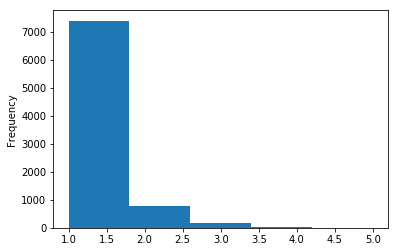

In [49]:
comp_distribution.plot.hist(bins=5)

In [30]:
df.to_csv('composition_scrape_ids.csv', index=False)

In [43]:
df_champ_expanded.to_csv('expanded_array.csv', index=False)

In [26]:
champion_dict = {y:i for i,y in enumerate([x.name for x in cass.get_champions('EUW')])}

In [28]:
df['champion_ids'] = df.champions.apply(lambda x: [champion_dict[y] for y in x])

In [27]:
champion_dict['Jhin']

46

In [14]:
dir(cass)

['ChallengerLeague',
 'Champion',
 'ChampionMasteries',
 'ChampionMastery',
 'ChampionRotation',
 'Champions',
 'CurrentMatch',
 'Division',
 'FeaturedMatches',
 'GameMode',
 'GameType',
 'GrandmasterLeague',
 'Item',
 'Items',
 'Key',
 'Lane',
 'LanguageStrings',
 'League',
 'LeagueEntries',
 'LeagueSummonerEntries',
 'Locales',
 'Map',
 'Maps',
 'MasterLeague',
 'MasteryTree',
 'Match',
 'MatchHistory',
 'Patch',
 'Platform',
 'Position',
 'ProfileIcon',
 'ProfileIcons',
 'Queue',
 'Rank',
 'Realms',
 'Region',
 'Resource',
 'Role',
 'Rune',
 'Runes',
 'Season',
 'Settings',
 'ShardStatus',
 'Side',
 'Summoner',
 'SummonerSpell',
 'SummonerSpells',
 'SummonersRiftArea',
 'Tier',
 'Tower',
 'VerificationString',
 'Versions',
 '_CassiopeiaConfiguration',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_configuration',
 '_get_pipeline',
 'apply_settings',
 'cassiopeia',
 'configuration',
 'core',
 'data',
 

In [119]:
match.participants[0].champion.name

'Heimerdinger'

In [75]:
match.participants[0].side.name

'blue'

In [85]:
not match.blue_team.win

False

In [90]:
match.participants[0].lane.value

'BOT_LANE'

In [105]:
dir(match.participants[0])

['_Participant__match',
 '__call__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__json__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 '_data_types',
 '_renamed',
 'champion',
 'cumulative_timeline',
 'enemy_team',
 'from_data',
 'id',
 'is_bot',
 'lane',
 'match_history_uri',
 'rank_last_season',
 'role',
 'runes',
 'side',
 'skill_order',
 'stat_runes',
 'stats',
 'summoner',
 'summoner_spell_d',
 'summoner_spell_f',
 'team',
 'timeline',
 'to_dict',
 'to_json',
 'version']

In [62]:
Out[60][10]

<Queue.ranked_flex_fives: 'RANKED_FLEX_SR'>